## Create Dataframe From CSV File

In [ ]:
%load_ext jupyternotify

In [61]:
import pandas as pd
import numpy as np

FILE_NAME = "training.1600000.processed.noemoticon.csv"
df = pd.read_csv(FILE_NAME, header=None, encoding="latin-1", names=["polarity", "id", "date", "query", "user", "text"], dtype={"polarity": np.int32})
df.drop(columns=["id", "date", "user"], inplace=True)

df.head()

<IPython.core.display.Javascript object>

,polarity,query,text
0,0,NO_QUERY,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,NO_QUERY,is upset that he can't update his Facebook by ...
2,0,NO_QUERY,@Kenichan I dived many times for the ball. Man...
3,0,NO_QUERY,my whole body feels itchy and like its on fire
4,0,NO_QUERY,"@nationwideclass no, it's not behaving at all...."


## EDA

<Axes: xlabel='polarity'>

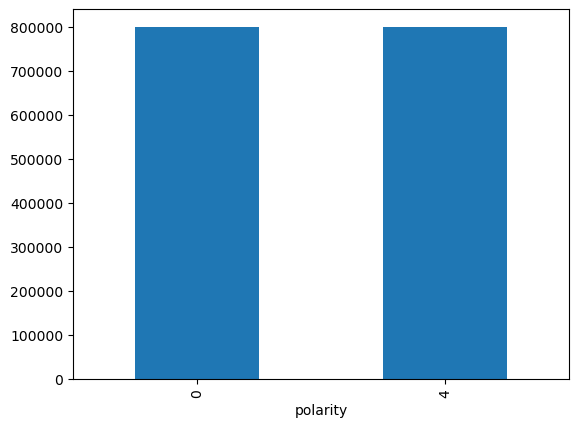

In [32]:
df["polarity"].value_counts().plot.bar(x="polarity", y="count")

In [40]:
df.dtypes

polarity     int32
query       object
text        object
dtype: object

In [105]:
df["polarity"].unique()

array([0, 4], dtype=int32)

In [24]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.1/473.1 kB 6.3 MB/s eta 0:00:00a 0:00:01


In [104]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

61841432


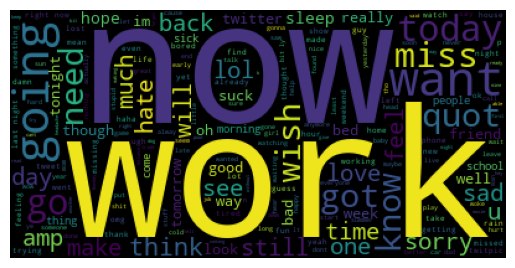

In [50]:
negative_text = "".join(x for x in df["text"].where(df["polarity"] == 0).astype(str))
print(len(negative_text))
neg_wc = WordCloud().generate_from_text(negative_text)

plt.imshow(neg_wc)
plt.axis("off")
plt.show()

61502746


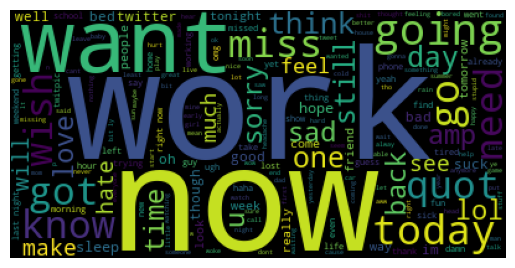

In [51]:
positive_text = "".join(x for x in df["text"].where(df["polarity"] == 4).astype(str))
print(len(positive_text))
pos_wc = WordCloud().generate_from_text(negative_text)

plt.imshow(pos_wc)
plt.axis("off")
plt.show()

## Data Preprocessing

In [56]:
!pip install nltk

In [4]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, RegexpTokenizer
import nltk
import re

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
stop_words = stopwords.words("english")

lemmatizer = WordNetLemmatizer()
link_regex = re.compile("(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))")
def preprocess(texts):
    tokenizer = RegexpTokenizer(r"[a-zA-Z0-9]+")
    output = []
    for text in texts:
        tokenized_text = text.lower().split()
        tokenized_text = [t.strip() for t in tokenized_text if t not in stop_words]
        # tokenized_text = [t for t in tokenized_text if t.isalnum() or link_regex.match(t) == None]
        tokenized_text = [t for t in tokenized_text if t.startswith("#") == False and t.startswith("@") == False and link_regex.match(t) == None]
        # output.append(tokenized_text)
        clean_text = " ".join(str(x) for x in tokenized_text)
        clean_text = tokenizer.tokenize(clean_text)
        
        output += [" ".join(lemmatizer.lemmatize(str(x)) for x in clean_text)]
    
    return output
    
print([df.iloc[671155, df.columns.get_loc("text")]])
print(preprocess([df.iloc[671155, df.columns.get_loc("text")], df.iloc[2, df.columns.get_loc("text")]]))

['Pickin up @misstinayao waitin on @sadittysash 2 hurry up...I odeeee missed dem  Table talk 2nite...LOL bout to be fat...']
['pickin waitin 2 hurry up i odeeee missed dem table talk 2nite lol bout fat', 'dived many time ball managed save 50 rest go bound']


## Create Model v1

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, ValidationCurveDisplay, LearningCurveDisplay
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score, log_loss, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df["text"].astype(str).to_numpy(), df["polarity"].to_numpy(), test_size=0.2, random_state=42, shuffle=True)

In [44]:
labels = df["polarity"].unique()
print(labels)

custom_f1 = make_scorer(f1_score, labels=labels, pos_label=4)
custom_precision = make_scorer(precision_score, labels=labels, pos_label=4)
custom_recall = make_scorer(recall_score, labels=labels, pos_label=4)

[0 4]


In [60]:
%%time

tfidf_vec = TfidfVectorizer(lowercase=False)
rf_pipeline = Pipeline([("preprocess", FunctionTransformer(preprocess)), ("vectorizer", tfidf_vec), ("clf", RandomForestClassifier(max_depth=3, n_jobs=-1))])

cv_result = cross_validate(
    rf_pipeline, X_train, y_train, cv=5, 
    scoring={
        "acc": "accuracy", 
        "cust_f1": custom_f1, 
        "cust_precision": custom_precision, 
        "cust_recall": custom_recall, 
        "ra": "roc_auc",
    }, 
    n_jobs=5, return_train_score=True)

print(f"Test accuracy:\t{cv_result['test_acc'].mean()}")
print(f"Test f1 score:\t{cv_result['test_cust_f1'].mean()}")
print(f"Test precision:\t{cv_result['test_cust_precision'].mean()}")
print(f"Test recall:\t{cv_result['test_cust_recall'].mean()}")
print(f"Test AUC:\t{cv_result['test_ra'].mean()}")
print("======================")
print(f"Train accuracy:\t{cv_result['train_acc'].mean()}")
print(f"Train f1 score:\t{cv_result['train_cust_f1'].mean()}")
print(f"Train precision:\t{cv_result['train_cust_precision'].mean()}")
print(f"Train recall:\t{cv_result['train_cust_recall'].mean()}")
print(f"Train AUC:\t{cv_result['train_ra'].mean()}")

cv_result

Test accuracy:	0.6444640625
Test f1 score:	0.6613285689576804
Test precision:	0.6363297752349151
Test recall:	0.7134887035591221
Test AUC:	0.7064822942238272
Train accuracy:	0.6453677734375
Train f1 score:	0.6628497086589171
Train precision:	0.6366854788778076
Train recall:	0.7167476383672494
Train AUC:	0.7077843004196946
CPU times: user 2.24 s, sys: 650 ms, total: 2.89 s
Wall time: 2min 25s


{'fit_time': array([37.65401602, 41.79881477, 45.730829  , 48.05068016, 48.881284  ]),
 'score_time': array([26.43723655, 23.11259007, 20.45673251, 18.78657794, 18.23689914]),
 'test_acc': array([0.64046484, 0.64866406, 0.64677734, 0.64448828, 0.64192578]),
 'train_acc': array([0.64154687, 0.6490166 , 0.64754785, 0.64604297, 0.64268457]),
 'test_cust_f1': array([0.68240369, 0.68540969, 0.69070561, 0.68683741, 0.56128646]),
 'train_cust_f1': array([0.68408659, 0.68627922, 0.69262955, 0.68876432, 0.56248886]),
 'test_cust_precision': array([0.61073709, 0.62011481, 0.61393044, 0.61334808, 0.72351845]),
 'train_cust_precision': array([0.61113375, 0.62001602, 0.61370764, 0.61420479, 0.72436519]),
 'test_cust_recall': array([0.77312567, 0.76607323, 0.7894276 , 0.78033448, 0.45848254]),
 'train_cust_recall': array([0.7768176 , 0.76840079, 0.79484553, 0.78392674, 0.45974754]),
 'test_ra': array([0.69656579, 0.70291977, 0.70321627, 0.70218992, 0.72751972]),
 'train_ra': array([0.69864077, 0.703

In [63]:
%%notify
%%time

params = {
    "vectorizer__ngram_range": [(1,1), (1, 2)],
    "vectorizer__use_idf": [True, False],
    "clf__max_depth": [4, 5, 6, 7, 8, 9, 10],
    "clf__criterion": ["gini", "entropy"],
}

grid_search = GridSearchCV(estimator=rf_pipeline, param_grid=params, cv=5, return_train_score=True, n_jobs=6, verbose=3)
fine_tuned_clf = grid_search.fit(X_train, y_train)

fine_tuned_clf

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV 3/5] END clf__criterion=gini, clf__max_depth=4, vectorizer__ngram_range=(1, 1), vectorizer__use_idf=True;, score=(train=0.677, test=0.675) total time= 1.0min
[CV 4/5] END clf__criterion=gini, clf__max_depth=4, vectorizer__ngram_range=(1, 1), vectorizer__use_idf=False;, score=(train=0.670, test=0.668) total time=  55.4s
[CV 5/5] END clf__criterion=gini, clf__max_depth=4, vectorizer__ngram_range=(1, 2), vectorizer__use_idf=True;, score=(train=0.577, test=0.578) total time= 1.4min
[CV 2/5] END clf__criterion=gini, clf__max_depth=5, vectorizer__ngram_range=(1, 1), vectorizer__use_idf=True;, score=(train=0.659, test=0.659) total time= 1.1min
[CV 1/5] END clf__criterion=gini, clf__max_depth=5, vectorizer__ngram_range=(1, 1), vectorizer__use_idf=False;, score=(train=0.703, test=0.702) total time= 1.0min


/opt/conda/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 5/5] END clf__criterion=gini, clf__max_depth=4, vectorizer__ngram_range=(1, 1), vectorizer__use_idf=True;, score=(train=0.657, test=0.657) total time= 1.0min
[CV 1/5] END clf__criterion=gini, clf__max_depth=4, vectorizer__ngram_range=(1, 2), vectorizer__use_idf=True;, score=(train=0.576, test=0.578) total time= 1.3min
[CV 2/5] END clf__criterion=gini, clf__max_depth=4, vectorizer__ngram_range=(1, 2), vectorizer__use_idf=False;, score=(train=0.595, test=0.595) total time= 1.4min
[CV 3/5] END clf__criterion=gini, clf__max_depth=5, vectorizer__ngram_range=(1, 1), vectorizer__use_idf=True;, score=(train=0.678, test=0.674) total time= 1.1min
[CV 3/5] END clf__criterion=gini, clf__max_depth=5, vectorizer__ngram_range=(1, 1), vectorizer__use_idf=False;, score=(train=0.683, test=0.681) total time= 1.0min
[CV 4/5] END clf__criterion=gini, clf__max_depth=5, vectorizer__ngram_range=(1, 2), vectorizer__use_idf=True;, score=(train=0.615, test=0.615) total time= 1.3min
[CV 5/5] END clf__criterio

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        FunctionTransformer(func=<function preprocess at 0x7f93c05bcfe0>)),
                                       ('vectorizer',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf',
                                        RandomForestClassifier(max_depth=3,
                                                               n_jobs=-1))]),
             n_jobs=6,
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'vectorizer__ngram_range': [(1, 1), (1, 2)],
                         'vectorizer__use_idf': [True, False]},
             return_train_score=True, verbose=3)

<IPython.core.display.Javascript object>

[CV 5/5] END clf__criterion=gini, clf__max_depth=10, vectorizer__ngram_range=(1, 1), vectorizer__use_idf=True;, score=(train=0.727, test=0.722) total time= 1.1min
[CV 1/5] END clf__criterion=gini, clf__max_depth=10, vectorizer__ngram_range=(1, 2), vectorizer__use_idf=True;, score=(train=0.642, test=0.641) total time= 1.4min
[CV 2/5] END clf__criterion=gini, clf__max_depth=10, vectorizer__ngram_range=(1, 2), vectorizer__use_idf=False;, score=(train=0.670, test=0.666) total time= 1.7min
[CV 3/5] END clf__criterion=entropy, clf__max_depth=4, vectorizer__ngram_range=(1, 1), vectorizer__use_idf=True;, score=(train=0.662, test=0.660) total time= 1.1min
[CV 4/5] END clf__criterion=entropy, clf__max_depth=4, vectorizer__ngram_range=(1, 1), vectorizer__use_idf=False;, score=(train=0.678, test=0.676) total time=  52.9s
[CV 5/5] END clf__criterion=entropy, clf__max_depth=4, vectorizer__ngram_range=(1, 2), vectorizer__use_idf=True;, score=(train=0.594, test=0.594) total time= 1.6min
[CV 1/5] END c

## Save Model

In [72]:
import pickle

pickle.dump(fine_tuned_clf.best_estimator_, open("./rf_v1.pkl", "wb"))
    

In [74]:
loaded_model = pickle.load(open("./rf_v1.pkl", 'rb'))

loaded_model

Pipeline(steps=[('preprocess',
                 FunctionTransformer(func=<function preprocess at 0x7f93c05bcfe0>)),
                ('vectorizer', TfidfVectorizer(lowercase=False, use_idf=False)),
                ('clf',
                 RandomForestClassifier(criterion='entropy', max_depth=10,
                                        n_jobs=-1))])

## Fine Tune Max Depth From Previous Best Estimator

In [84]:
%%notify
%%time

params = {
    "vectorizer__use_idf": [False],
    "clf__max_depth": [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    "clf__criterion": ["entropy"],
}

grid_search = GridSearchCV(estimator=fine_tuned_clf.best_estimator_, param_grid=params, cv=5, return_train_score=True, n_jobs=6, verbose=2)
fine_tuned_clf = grid_search.fit(X_train, y_train)

fine_tuned_clf

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] END clf__criterion=entropy, clf__max_depth=10, vectorizer__use_idf=False; total time= 1.1min
[CV] END clf__criterion=entropy, clf__max_depth=11, vectorizer__use_idf=False; total time= 1.2min
[CV] END clf__criterion=entropy, clf__max_depth=12, vectorizer__use_idf=False; total time= 1.1min
[CV] END clf__criterion=entropy, clf__max_depth=13, vectorizer__use_idf=False; total time= 1.1min
[CV] END clf__criterion=entropy, clf__max_depth=15, vectorizer__use_idf=False; total time= 1.1min


/opt/conda/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END clf__criterion=entropy, clf__max_depth=10, vectorizer__use_idf=False; total time= 1.1min
[CV] END clf__criterion=entropy, clf__max_depth=11, vectorizer__use_idf=False; total time= 1.1min
[CV] END clf__criterion=entropy, clf__max_depth=13, vectorizer__use_idf=False; total time= 1.1min
[CV] END clf__criterion=entropy, clf__max_depth=14, vectorizer__use_idf=False; total time= 1.2min
[CV] END clf__criterion=entropy, clf__max_depth=15, vectorizer__use_idf=False; total time= 1.2min
[CV] END clf__criterion=entropy, clf__max_depth=16, vectorizer__use_idf=False; total time= 1.2min
[CV] END clf__criterion=entropy, clf__max_depth=17, vectorizer__use_idf=False; total time= 1.3min
[CV] END clf__criterion=entropy, clf__max_depth=18, vectorizer__use_idf=False; total time= 1.3min
CPU times: user 3min 42s, sys: 7.21 s, total: 3min 49s
Wall time: 18min 23s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        FunctionTransformer(func=<function preprocess at 0x7f93c05bcfe0>)),
                                       ('vectorizer',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf',
                                        RandomForestClassifier(max_depth=3,
                                                               n_jobs=-1))]),
             n_jobs=6,
             param_grid={'clf__criterion': ['entropy'],
                         'clf__max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18,
                                            19, 20],
                         'vectorizer__use_idf': [False]},
             return_train_score=True, verbose=2)

<IPython.core.display.Javascript object>

In [112]:
fine_tuned_clf.cv_results_

{'mean_fit_time': array([ 79.41381221,  83.4655592 ,  86.85558519,  92.85071921,
        103.40951238]),
 'std_fit_time': array([ 5.66219876,  7.37951169, 13.30861347, 17.40251458, 23.80511483]),
 'mean_score_time': array([15.60367446, 24.10719829, 26.74967332, 25.41001248, 16.9649087 ]),
 'std_score_time': array([ 4.78730872, 10.47869425, 14.02436677, 14.26501184,  8.37360349]),
 'param_clf__n_estimators': masked_array(data=[100, 125, 150, 175, 200],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'clf__n_estimators': 100},
  {'clf__n_estimators': 125},
  {'clf__n_estimators': 150},
  {'clf__n_estimators': 175},
  {'clf__n_estimators': 200}],
 'split0_test_score': array([0.72896484, 0.73696875, 0.74292578, 0.74308984, 0.74429297]),
 'split1_test_score': array([0.73242969, 0.73596875, 0.73774609, 0.74264844, 0.74185937]),
 'split2_test_score': array([0.73287891, 0.73904297, 0.74207422, 0.73935938, 0.74550781]),
 '

## Learning Curve v1

[CV] END clf__criterion=entropy, clf__max_depth=16, vectorizer__use_idf=False; total time= 1.2min
[CV] END clf__criterion=entropy, clf__max_depth=17, vectorizer__use_idf=False; total time= 1.2min
[CV] END clf__criterion=entropy, clf__max_depth=18, vectorizer__use_idf=False; total time= 1.3min
[CV] END clf__criterion=entropy, clf__max_depth=19, vectorizer__use_idf=False; total time= 1.3min
[CV] END clf__criterion=entropy, clf__max_depth=10, vectorizer__use_idf=False; total time= 1.1min
[CV] END clf__criterion=entropy, clf__max_depth=11, vectorizer__use_idf=False; total time= 1.1min
[CV] END clf__criterion=entropy, clf__max_depth=12, vectorizer__use_idf=False; total time= 1.2min
[CV] END clf__criterion=entropy, clf__max_depth=14, vectorizer__use_idf=False; total time= 1.2min
[CV] END clf__criterion=entropy, clf__max_depth=15, vectorizer__use_idf=False; total time= 1.2min
[CV] END clf__criterion=entropy, clf__max_depth=16, vectorizer__use_idf=False; total time= 1.2min
[CV] END clf__criter

NameError: name 'plt' is not defined

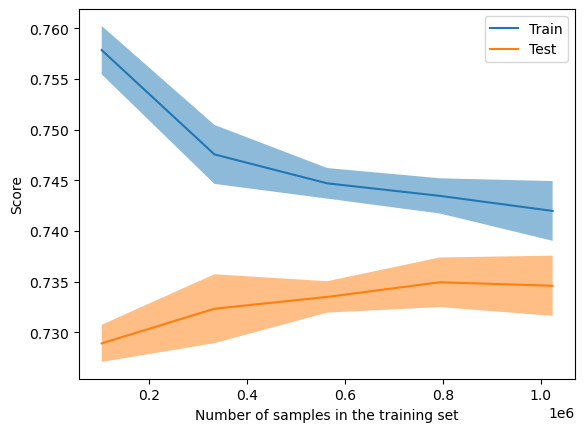

In [89]:
%%time

LearningCurveDisplay.from_estimator(loaded_model, X_train, y_train)

plt.show()

## Save Model v1.1

In [87]:
pickle.dump(fine_tuned_clf.best_estimator_, open("./rf_v1.1.pkl", "wb"))

In [88]:
loaded_model = pickle.load(open("./rf_v1.1.pkl", 'rb'))

loaded_model

Pipeline(steps=[('preprocess',
                 FunctionTransformer(func=<function preprocess at 0x7f93c05bcfe0>)),
                ('vectorizer', TfidfVectorizer(lowercase=False, use_idf=False)),
                ('clf',
                 RandomForestClassifier(criterion='entropy', max_depth=20,
                                        n_jobs=-1))])

## Fine Tune From v1.1 (n_estimator)

In [96]:
%%notify
%%time

params = {
    "clf__n_estimators": [100, 125, 150, 175, 200]
}

grid_search = GridSearchCV(estimator=fine_tuned_clf.best_estimator_, param_grid=params, cv=5, return_train_score=True, n_jobs=6, verbose=2)
fine_tuned_clf = grid_search.fit(X_train, y_train)

fine_tuned_clf

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..............................clf__n_estimators=100; total time= 1.6min
[CV] END ..............................clf__n_estimators=125; total time= 1.8min
[CV] END ..............................clf__n_estimators=150; total time= 2.0min


/opt/conda/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END ..............................clf__n_estimators=125; total time= 1.6min
[CV] END ..............................clf__n_estimators=150; total time= 1.8min
[CV] END ..............................clf__n_estimators=175; total time= 2.0min
[CV] END ..............................clf__n_estimators=100; total time= 1.6min
[CV] END ..............................clf__n_estimators=125; total time= 1.9min
[CV] END ..............................clf__n_estimators=150; total time= 1.9min
[CV] END ..............................clf__n_estimators=175; total time= 2.1min
CPU times: user 6min 19s, sys: 4.85 s, total: 6min 23s
Wall time: 12min 43s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        FunctionTransformer(func=<function preprocess at 0x7f93c05bcfe0>)),
                                       ('vectorizer',
                                        TfidfVectorizer(lowercase=False,
                                                        use_idf=False)),
                                       ('clf',
                                        RandomForestClassifier(criterion='entropy',
                                                               max_depth=20,
                                                               n_jobs=-1))]),
             n_jobs=6,
             param_grid={'clf__n_estimators': [100, 125, 150, 175, 200]},
             return_train_score=True, verbose=2)

<IPython.core.display.Javascript object>

[CV] END ..............................clf__n_estimators=200; total time= 2.3min
[CV] END ..............................clf__n_estimators=100; total time= 1.6min
[CV] END ..............................clf__n_estimators=125; total time= 1.8min
[CV] END ..............................clf__n_estimators=175; total time= 2.0min
[CV] END ..............................clf__n_estimators=200; total time= 2.2min
[CV] END ..............................clf__n_estimators=100; total time= 1.6min
[CV] END ..............................clf__n_estimators=150; total time= 1.9min
[CV] END ..............................clf__n_estimators=175; total time= 2.0min
[CV] END ..............................clf__n_estimators=200; total time= 2.2min
[CV] END ..............................clf__n_estimators=200; total time= 2.2min
[CV] END ..............................clf__n_estimators=100; total time= 1.6min
[CV] END ..............................clf__n_estimators=125; total time= 1.8min
[CV] END ...................

In [97]:
fine_tuned_clf.best_estimator_

Pipeline(steps=[('preprocess',
                 FunctionTransformer(func=<function preprocess at 0x7f93c05bcfe0>)),
                ('vectorizer', TfidfVectorizer(lowercase=False, use_idf=False)),
                ('clf',
                 RandomForestClassifier(criterion='entropy', max_depth=20,
                                        n_estimators=200, n_jobs=-1))])

In [99]:
fine_tuned_clf.cv_results_

{'mean_fit_time': array([ 79.41381221,  83.4655592 ,  86.85558519,  92.85071921,
        103.40951238]),
 'std_fit_time': array([ 5.66219876,  7.37951169, 13.30861347, 17.40251458, 23.80511483]),
 'mean_score_time': array([15.60367446, 24.10719829, 26.74967332, 25.41001248, 16.9649087 ]),
 'std_score_time': array([ 4.78730872, 10.47869425, 14.02436677, 14.26501184,  8.37360349]),
 'param_clf__n_estimators': masked_array(data=[100, 125, 150, 175, 200],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'clf__n_estimators': 100},
  {'clf__n_estimators': 125},
  {'clf__n_estimators': 150},
  {'clf__n_estimators': 175},
  {'clf__n_estimators': 200}],
 'split0_test_score': array([0.72896484, 0.73696875, 0.74292578, 0.74308984, 0.74429297]),
 'split1_test_score': array([0.73242969, 0.73596875, 0.73774609, 0.74264844, 0.74185937]),
 'split2_test_score': array([0.73287891, 0.73904297, 0.74207422, 0.73935938, 0.74550781]),
 '

## Learning Curve v1.2

NameError: name 'plt' is not defined

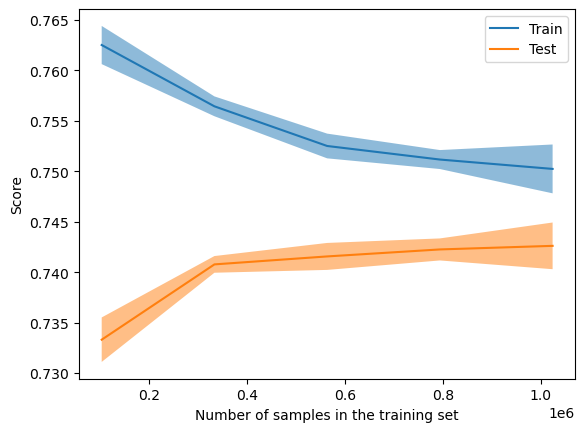

In [103]:
%%time

LearningCurveDisplay.from_estimator(loaded_model, X_train, y_train)

plt.show()

## Save Model v1.2

In [100]:
pickle.dump(fine_tuned_clf.best_estimator_, open("./rf_v1.2.pkl", "wb"))

In [102]:
loaded_model = pickle.load(open("./rf_v1.2.pkl", 'rb'))

loaded_model

Pipeline(steps=[('preprocess',
                 FunctionTransformer(func=<function preprocess at 0x7f93c05bcfe0>)),
                ('vectorizer', TfidfVectorizer(lowercase=False, use_idf=False)),
                ('clf',
                 RandomForestClassifier(criterion='entropy', max_depth=20,
                                        n_estimators=200, n_jobs=-1))])

## Predict Test Dataset

In [138]:
y_pred = loaded_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1 score: {f1_score(y_test, y_pred, pos_label=4)}")
print(f"Recall score: {recall_score(y_test, y_pred, pos_label=4)}")
print(f"Precision score: {precision_score(y_test, y_pred, pos_label=4)}")

Accuracy: 0.743975
F1 score: 0.7558542181959056
Recall score: 0.7901324561075599
Precision score: 0.7244264954530915
